In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
import bfunc

In [3]:
reg = 'M8S'
line = 'M8S'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

6.711332879527353

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
box_size = np.sqrt((data.X.max()-data.X.min())*(data.Y.max()-data.Y.min()))*VF['pc']*3600

In [8]:
table = sosflog(data,0.05,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                                 \
      count         mean        std          min          25%          50%   
ils                                                                          
0      70.0     7.498491   2.375462     3.263175     5.302550     7.276744   
1      13.0    11.861440   0.443460    11.331001    11.499163    11.915582   
2      20.0    13.214266   0.366748    12.654309    12.983676    13.176133   
3      30.0    15.060513   0.573311    14.194495    14.519337    15.211512   
4      36.0    16.893390   0.501101    16.126740    16.395234    16.864835   
5      39.0    18.722498   0.642220    17.831891    18.146024    18.703968   
6      54.0    21.098188   0.661365    19.974009    20.557409    21.094781   
7      83.0    23.634399   0.720841    22.391707    23.070938    23.642562   
8      70.0    26.621353   0.967477    25.190928    25.651971    26.625280   
9     112.0    29.755429   0.995495    28.209031    28.933469    29.511700   
10    121.0    33.380167   1.219992    31.635194    32.256142    33.178389   
11    167.0    37.652537   1.336516    35.511184    36.400599    37.658275   
12    229.0    42.330760   1.369219    39.866418    41.132905    42.441767   
13    245.0    47.482016   1.548464    44.672628    46.053430    47.451422   
14    315.0    53.357326   1.812019    50.119745    51.876234    53.400168   
15    402.0    59.825154   2.031251    56.248081    58.079941    59.836587   
16    493.0    66.853106   2.226900    63.152865    64.896450    66.877778   
17    695.0    75.235086   2.502711    70.798404    73.082617    75.318029   
18    780.0    84.473600   2.852321    79.438952    82.052552    84.556303   
19    970.0    94.610489   3.178759    89.132524    91.642365    94.507462   
20   1168.0   106.006111   3.505062   100.000364   102.951401   105.960720   
21   1465.0   118.981936   3.886309   112.210819   115.620466   119.007276   
22   1772.0   133.664726   4.410391   125.893335   129.889811   133.702188   
23   2181.0   149.800053   4.938788   141.256644   145.519136   149.875401   
24   2508.0   168.078169   5.591139   158.493231   163.177201   167.895950   
25   2928.0   188.795419   6.283245   177.828089   183.420335   188.616406   
26   3602.0   211.879505   7.046224   199.531125   205.507844   212.049860   
27   4251.0   237.413896   7.866475   223.876317   230.669970   237.360419   
28   4818.0   266.689846   8.911357   251.192581   258.994786   266.694601   
29   5659.0   299.078794   9.949722   281.848152   290.686410   299.159294   
30   6569.0   335.694888  11.102334   316.228045   326.119452   335.986317   
31   7220.0   376.421594  12.396134   354.813395   365.661593   376.496203   
32   8322.0   422.264672  14.021493   398.107397   410.046317   422.155232   
33   8626.0   473.605076  15.639175   446.689533   460.138998   473.533933   
34   8887.0   531.429813  17.595259   501.188153   515.882370   531.185678   
35   8591.0   595.753108  19.913415   562.342072   578.405451   594.819745   
36   7991.0   668.099425  22.192398   630.963361   648.757337   666.916807   
37   6326.0   747.790127  24.694295   707.948323   726.107100   746.413031   
38   3958.0   837.184938  27.122231   794.348253   813.191742   835.342480   
39   2099.0   939.183858  31.168963   891.264064   911.441176   936.176913   
40    945.0  1049.362472  33.621453  1000.047272  1020.842964  1043.205806   
41    218.0  1169.262552  37.059333  1122.493239  1137.706295  1160.358311   
42     31.0  1311.719981  38.440985  1259.573416  1283.750487  1309.751968   
43      1.0  1439.971906        NaN  1439.971906  1439.971906  1439.971906   

                                  dV2                                          \
             75%          max   count       mean        std     min       25%   
ils                                                                             
0       9.791377    11.164708    70.0   0.412816   0.699525  0.0001  0.034900   
1      12.341369   

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

0.7345940221254865

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.21097854563318802

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

6.24782140909096

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
m = 1.0

In [16]:
rgrid = np.logspace(-2, 1)

(6.711332879527353, 0.7345940221254865, 1.0)

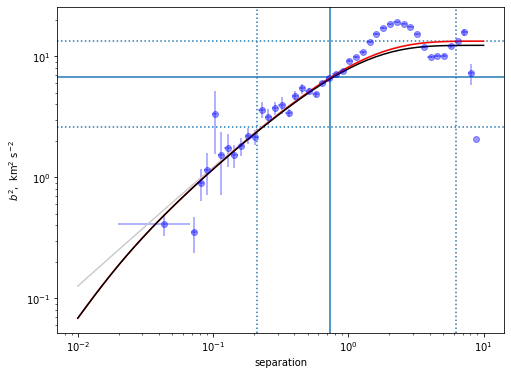

In [17]:
s0 = VF['s0']
noise = 0.01

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc.bfunc00s(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc.bfunc03s(rgrid, r0, sig2, m, s0, noise), color="red")
ax.plot(rgrid, bfunc.bfunc04s(rgrid, r0, sig2, m, s0, noise, box_size), color="black")


ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [18]:
table

s                                                                 \
      count         mean        std          min          25%          50%   
ils                                                                          
0      70.0     7.498491   2.375462     3.263175     5.302550     7.276744   
1      13.0    11.861440   0.443460    11.331001    11.499163    11.915582   
2      20.0    13.214266   0.366748    12.654309    12.983676    13.176133   
3      30.0    15.060513   0.573311    14.194495    14.519337    15.211512   
4      36.0    16.893390   0.501101    16.126740    16.395234    16.864835   
5      39.0    18.722498   0.642220    17.831891    18.146024    18.703968   
6      54.0    21.098188   0.661365    19.974009    20.557409    21.094781   
7      83.0    23.634399   0.720841    22.391707    23.070938    23.642562   
8      70.0    26.621353   0.967477    25.190928    25.651971    26.625280   
9     112.0    29.755429   0.995495    28.209031    28.933469    29.511700   
10    121.0    33.380167   1.219992    31.635194    32.256142    33.178389   
11    167.0    37.652537   1.336516    35.511184    36.400599    37.658275   
12    229.0    42.330760   1.369219    39.866418    41.132905    42.441767   
13    245.0    47.482016   1.548464    44.672628    46.053430    47.451422   
14    315.0    53.357326   1.812019    50.119745    51.876234    53.400168   
15    402.0    59.825154   2.031251    56.248081    58.079941    59.836587   
16    493.0    66.853106   2.226900    63.152865    64.896450    66.877778   
17    695.0    75.235086   2.502711    70.798404    73.082617    75.318029   
18    780.0    84.473600   2.852321    79.438952    82.052552    84.556303   
19    970.0    94.610489   3.178759    89.132524    91.642365    94.507462   
20   1168.0   106.006111   3.505062   100.000364   102.951401   105.960720   
21   1465.0   118.981936   3.886309   112.210819   115.620466   119.007276   
22   1772.0   133.664726   4.410391   125.893335   129.889811   133.702188   
23   2181.0   149.800053   4.938788   141.256644   145.519136   149.875401   
24   2508.0   168.078169   5.591139   158.493231   163.177201   167.895950   
25   2928.0   188.795419   6.283245   177.828089   183.420335   188.616406   
26   3602.0   211.879505   7.046224   199.531125   205.507844   212.049860   
27   4251.0   237.413896   7.866475   223.876317   230.669970   237.360419   
28   4818.0   266.689846   8.911357   251.192581   258.994786   266.694601   
29   5659.0   299.078794   9.949722   281.848152   290.686410   299.159294   
30   6569.0   335.694888  11.102334   316.228045   326.119452   335.986317   
31   7220.0   376.421594  12.396134   354.813395   365.661593   376.496203   
32   8322.0   422.264672  14.021493   398.107397   410.046317   422.155232   
33   8626.0   473.605076  15.639175   446.689533   460.138998   473.533933   
34   8887.0   531.429813  17.595259   501.188153   515.882370   531.185678   
35   8591.0   595.753108  19.913415   562.342072   578.405451   594.819745   
36   7991.0   668.099425  22.192398   630.963361   648.757337   666.916807   
37   6326.0   747.790127  24.694295   707.948323   726.107100   746.413031   
38   3958.0   837.184938  27.122231   794.348253   813.191742   835.342480   
39   2099.0   939.183858  31.168963   891.264064   911.441176   936.176913   
40    945.0  1049.362472  33.621453  1000.047272  1020.842964  1043.205806   
41    218.0  1169.262552  37.059333  1122.493239  1137.706295  1160.358311   
42     31.0  1311.719981  38.440985  1259.573416  1283.750487  1309.751968   
43      1.0  1439.971906        NaN  1439.971906  1439.971906  1439.971906   

                                  dV2                                          \
             75%          max   count       mean        std     min       25%   
ils                                                                             
0       9.791377    11.164708    70.0   0.412816   0.699525  0.0001  0.034900   
1      12.341369   

In [19]:
M8 = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m,
        'box_size': box_size}

In [20]:
f = open('Results\\SF'+ line + '.pkl',"wb")
pickle.dump(M8,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.970075607299805 seconds ---
